# Feature Selection

Choosing the most effective variables



In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import ensemble, tree, linear_model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr

plt.style.use('seaborn')
import re
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp
from scipy.stats import norm
import missingno as msno
import datetime
import pickle

In [2]:
# load dataframes
with open("../pickles/df_after_feature_engineering.pkl", "rb") as f:
    df = pickle.load(f)

In [3]:
df.head()

,gameID,leagueID,season,date,homeTeamID,awayTeamID,home_Goals,away_Goals,home_GoalsHalfTime,away_GoalsHalfTime,...,recent_form_diff,interaction_goal_rate_vs_blocks,interaction_goal_rate_vs_conceded,interaction_xG_efficiency_vs_shots_conceded,rolling_xG_vs_shot_conceded,rolling_shot_rate_vs_blocks,discipline_matchup_score,interaction_away_goal_rate_vs_home_def,interaction_away_form_vs_home_cards,form_vs_discipline_gap
5437,6185,5,2014,2014-08-08 19:30:00,177,161,2,2,2,1,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
5438,6186,5,2014,2014-08-09 20:00:00,162,164,3,3,1,2,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.392846,0.047790,-0.028571
5439,6187,5,2014,2014-08-09 20:00:00,209,165,0,3,0,3,...,0.0,1.713977,9523.809524,174392.090970,0.0,0.0,0.006144,1.499865,0.070921,-0.035714
5440,6188,5,2014,2014-08-09 20:00:00,169,175,0,2,0,1,...,0.0,1.259045,0.074073,1.113665,0.0,0.0,0.004831,0.473663,0.066536,-0.031189
5441,6189,5,2014,2014-08-09 20:00:00,160,180,0,0,0,0,...,0.0,0.227264,0.040404,0.536304,0.0,0.0,0.003565,0.760592,0.068226,-0.002229


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12680 entries, 5437 to 12679
Data columns (total 107 columns):
 #    Column                                       Dtype         
---   ------                                       -----         
 0    gameID                                       int64         
 1    leagueID                                     int64         
 2    season                                       int64         
 3    date                                         datetime64[ns]
 4    homeTeamID                                   int64         
 5    awayTeamID                                   int64         
 6    home_Goals                                   int64         
 7    away_Goals                                   int64         
 8    home_GoalsHalfTime                           int64         
 9    away_GoalsHalfTime                           int64         
 10   home_xGoals                                  float64       
 11   home_shots             

In [5]:
#Creating Variables dataframes
varSel = pd.DataFrame({'Variable': df.columns.drop('gameresult')})
varSel

,Variable
0,gameID
1,leagueID
2,season
3,date
4,homeTeamID
...,...
101,rolling_shot_rate_vs_blocks
102,discipline_matchup_score
103,interaction_away_goal_rate_vs_home_def
104,interaction_away_form_vs_home_cards


## Univariable Analysis

In [6]:
#from importlib import reload
from pyMechkar.analysis import Table1
#reload(tb1)

In [7]:
nm = df.columns.drop('gameresult')
nm = nm.append(pd.Index(['gameresult']))
nm

Index(['gameID', 'leagueID', 'season', 'date', 'homeTeamID', 'awayTeamID',
       'home_Goals', 'away_Goals', 'home_GoalsHalfTime', 'away_GoalsHalfTime',
       ...
       'interaction_goal_rate_vs_blocks', 'interaction_goal_rate_vs_conceded',
       'interaction_xG_efficiency_vs_shots_conceded',
       'rolling_xG_vs_shot_conceded', 'rolling_shot_rate_vs_blocks',
       'discipline_matchup_score', 'interaction_away_goal_rate_vs_home_def',
       'interaction_away_form_vs_home_cards', 'form_vs_discipline_gap',
       'gameresult'],
      dtype='object', length=107)

In [40]:
df2 = df[nm].copy()
df2.head()

,gameID,leagueID,season,date,homeTeamID,awayTeamID,home_Goals,away_Goals,home_GoalsHalfTime,away_GoalsHalfTime,...,interaction_goal_rate_vs_blocks,interaction_goal_rate_vs_conceded,interaction_xG_efficiency_vs_shots_conceded,rolling_xG_vs_shot_conceded,rolling_shot_rate_vs_blocks,discipline_matchup_score,interaction_away_goal_rate_vs_home_def,interaction_away_form_vs_home_cards,form_vs_discipline_gap,gameresult
5437,6185,5,2014,2014-08-08 19:30:00,177,161,2,2,2,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1
5438,6186,5,2014,2014-08-09 20:00:00,162,164,3,3,1,2,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.392846,0.047790,-0.028571,1
5439,6187,5,2014,2014-08-09 20:00:00,209,165,0,3,0,3,...,1.713977,9523.809524,174392.090970,0.0,0.0,0.006144,1.499865,0.070921,-0.035714,0
5440,6188,5,2014,2014-08-09 20:00:00,169,175,0,2,0,1,...,1.259045,0.074073,1.113665,0.0,0.0,0.004831,0.473663,0.066536,-0.031189,0
5441,6189,5,2014,2014-08-09 20:00:00,160,180,0,0,0,0,...,0.227264,0.040404,0.536304,0.0,0.0,0.003565,0.760592,0.068226,-0.002229,1


In [41]:
tab1 = Table1(data=df2, y="gameresult")

Begining analysis...
Factorizing... please wait
**********************************************************************************************************
['The variable date is a date. Dates are not allowed in Table1... avoided']
***********************************************************************************************************
***********************************************************************************************************
***********************************************************************************************************
['Unable to calcualte the Fisher exact test for variables away_GoalsHalfTime and gameresult... The p-value may be incorrect', 'Unable to calcualte the Fisher exact test for variables home_redCards and gameresult... The p-value may be incorrect', 'Unable to calcualte the Fisher exact test for variables home_total_red_cards and gameresult... The p-value may be incorrect', 'Unable to calcualte the Fisher exact test for variables away_redCards a

In [42]:
from IPython.display import display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

display(tab1)


,Variables,Categories,Population,Category_1,Category_0,Category_2,p_value
0,Individuals,n,12680,3172,3854,5654,NaN
1,gameID,Mean (SD),"7,877.70 (4,753.60)","7,895.50 (4,772.90)","8,125.40 (4,827.10)","7,698.90 (4,683.90)",0.000
2,gameID,Median (IQR),"7,981.50 (3,812.80-12,023.20)","8,035.50 (3,868.50-12,021.00)","8,202.00 (3,986.50-12,385.80)","7,810.50 (3,703.20-11,820.20)",NaN
4,leagueID,1,"2,660.00 ( 21.00%)",629.00 ( 19.80%),845.00 ( 21.90%),"1,186.00 ( 21.00%)",NaN
5,leagueID,2,"2,660.00 ( 21.00%)",668.00 ( 21.10%),837.00 ( 21.70%),"1,155.00 ( 20.40%)",0.247
6,leagueID,4,"2,660.00 ( 21.00%)",682.00 ( 21.50%),764.00 ( 19.80%),"1,214.00 ( 21.50%)",NaN
7,leagueID,5,"2,558.00 ( 20.20%)",661.00 ( 20.80%),757.00 ( 19.60%),"1,140.00 ( 20.20%)",NaN
8,leagueID,3,"2,142.00 ( 16.90%)",532.00 ( 16.80%),651.00 ( 16.90%),959.00 ( 17.00%),NaN
9,season,Mean (SD),"2,017.00 ( 2.00)","2,017.00 ( 2.00)","2,017.10 ( 2.00)","2,016.90 ( 2.00)",0.000
10,season,Median (IQR),"2,017.00 (2,015.00-2,019.00)","2,017.00 (2,015.00-2,019.00)","2,017.00 (2,015.00-2,019.00)","2,017.00 (2,015.00-2,019.00)",NaN


In [43]:
tab1[tab1['p_value']<0.05]

,Variables,Categories,Population,Category_1,Category_0,Category_2,p_value
1,gameID,Mean (SD),"7,877.70 (4,753.60)","7,895.50 (4,772.90)","8,125.40 (4,827.10)","7,698.90 (4,683.90)",0.000
9,season,Mean (SD),"2,017.00 ( 2.00)","2,017.00 ( 2.00)","2,017.10 ( 2.00)","2,016.90 ( 2.00)",0.000
12,homeTeamID,Mean (SD),135.30 ( 42.80),137.20 ( 43.10),138.80 ( 46.40),131.90 ( 39.60),0.000
15,awayTeamID,Mean (SD),135.30 ( 42.80),135.80 ( 42.30),130.50 ( 39.70),138.40 ( 44.70),0.000
18,home_Goals,Mean (SD),1.50 ( 1.30),1.00 ( 0.80),0.60 ( 0.70),2.50 ( 1.20),0.000
21,away_Goals,Mean (SD),1.20 ( 1.20),1.00 ( 0.80),2.30 ( 1.10),0.60 ( 0.70),0.000
24,home_GoalsHalfTime,Mean (SD),0.70 ( 0.80),0.50 ( 0.60),0.30 ( 0.50),1.10 ( 0.90),0.000
28,away_GoalsHalfTime,1,"3,847.00 ( 30.30%)","1,013.00 ( 31.90%)","1,647.00 ( 42.70%)","1,187.00 ( 21.00%)",0.000
33,home_xGoals,Mean (SD),1.40 ( 0.80),1.30 ( 0.70),1.00 ( 0.60),1.80 ( 0.80),0.000
36,home_shots,Mean (SD),13.50 ( 4.90),13.20 ( 4.90),12.30 ( 4.80),14.40 ( 4.80),0.000


In [44]:

# Reset to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [45]:
vn1 = tab1.loc[tab1['p_value']<0.05,'Variables'].unique()
print(len(vn1))
vn1

62


array(['gameID', 'season', 'homeTeamID', 'awayTeamID', 'home_Goals',
       'away_Goals', 'home_GoalsHalfTime', 'away_GoalsHalfTime',
       'home_xGoals', 'home_shots', 'home_shotsOnTarget', 'home_deep',
       'home_ppda', 'home_fouls', 'home_corners', 'home_yellowCards',
       'home_redCards', 'home_total_assists', 'home_total_xAssists',
       'home_total_key_passes', 'home_total_xGoalsChain',
       'home_total_xGoalsBuildup', 'home_total_yellow_cards',
       'home_total_red_cards', 'home_total_blocked_shots',
       'home_total_saved_shots', 'away_xGoals', 'away_shots',
       'away_shotsOnTarget', 'away_deep', 'away_ppda', 'away_fouls',
       'away_corners', 'away_yellowCards', 'away_redCards',
       'away_total_assists', 'away_total_xAssists',
       'away_total_key_passes', 'away_total_xGoalsChain',
       'away_total_xGoalsBuildup', 'away_total_yellow_cards',
       'away_total_red_cards', 'away_total_blocked_shots',
       'away_total_saved_shots', 'home_redCards_binary'

We will add these variables to our variable selection table

In [46]:
varSel['Univarable'] = 0
varSel.loc[varSel['Variable'].isin(vn1), 'Univarable'] = 1
varSel

,Variable,Univarable,Lasso
0,gameID,1,0
1,leagueID,0,0
2,season,1,0
3,date,0,0
4,homeTeamID,1,0
...,...,...,...
101,rolling_shot_rate_vs_blocks,0,0
102,discipline_matchup_score,0,0
103,interaction_away_goal_rate_vs_home_def,0,0
104,interaction_away_form_vs_home_cards,0,0


# Multivariable Analysis

In [47]:
### drop na
df2 = df2.dropna()

In [48]:
# remove unnecessary vars (in this case the target variable)
X = df2.iloc[:,:-1]
X

,gameID,leagueID,season,date,homeTeamID,awayTeamID,home_Goals,away_Goals,home_GoalsHalfTime,away_GoalsHalfTime,...,recent_form_diff,interaction_goal_rate_vs_blocks,interaction_goal_rate_vs_conceded,interaction_xG_efficiency_vs_shots_conceded,rolling_xG_vs_shot_conceded,rolling_shot_rate_vs_blocks,discipline_matchup_score,interaction_away_goal_rate_vs_home_def,interaction_away_form_vs_home_cards,form_vs_discipline_gap
5437,6185,5,2014,2014-08-08 19:30:00,177,161,2,2,2,1,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5438,6186,5,2014,2014-08-09 20:00:00,162,164,3,3,1,2,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.392846,0.047790,-0.028571
5439,6187,5,2014,2014-08-09 20:00:00,209,165,0,3,0,3,...,0.0,1.713977,9523.809524,174392.090970,0.000000,0.000000,0.006144,1.499865,0.070921,-0.035714
5440,6188,5,2014,2014-08-09 20:00:00,169,175,0,2,0,1,...,0.0,1.259045,0.074073,1.113665,0.000000,0.000000,0.004831,0.473663,0.066536,-0.031189
5441,6189,5,2014,2014-08-09 20:00:00,160,180,0,0,0,0,...,0.0,0.227264,0.040404,0.536304,0.000000,0.000000,0.003565,0.760592,0.068226,-0.002229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,16131,5,2020,2021-05-23 19:00:00,168,166,1,2,1,1,...,2.0,0.709173,0.055504,0.689314,5.982849,0.833278,0.005526,0.366958,0.062061,0.002703
12676,16132,5,2020,2021-05-23 19:00:00,177,176,1,2,1,1,...,-1.0,0.305544,0.045139,0.538391,1.407168,0.271595,0.004440,0.051354,0.062261,-0.002233
12677,16133,5,2020,2021-05-23 19:00:00,163,235,2,0,1,0,...,-5.0,0.262458,0.045931,0.563541,0.914720,0.064100,0.004306,0.859289,0.057900,-0.002056
12678,16134,5,2020,2021-05-23 19:00:00,175,181,0,1,0,1,...,-1.0,0.785636,0.040640,0.485981,0.356758,0.175421,0.004414,0.401440,0.054791,-0.000600


In [49]:
y = df2.iloc[:,-1:]
print([X.shape,y.shape])

[(12680, 106), (12680, 1)]


## Variable Selection using LASSO (L1 penalization)

In [50]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler


In [51]:
# Step 0: X = full feature dataframe, y = target
X_encoded = X.copy()

# Step 1: Encode categorical columns using .cat.codes
for col in X_encoded.select_dtypes(include=['category', 'object']).columns:
    X_encoded[col] = X_encoded[col].astype('category').cat.codes

# Step 2: Drop datetime columns if still present
X_encoded = X_encoded.drop(columns=[
    col for col in X_encoded.columns 
    if np.issubdtype(X_encoded[col].dtype, np.datetime64)
], errors='ignore')

# Step 3: Handle missing values
X_encoded = X_encoded.dropna()  # or use .fillna(method='ffill') or .fillna(0)

# Step 4: Align y
y_clean = y.loc[X_encoded.index]

# Step 5: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [52]:
X = X_scaled
y = y_clean

In [53]:
lassomod = Lasso(alpha=0.01).fit(X, y)

In [54]:
model = SelectFromModel(lassomod, prefit=True)
model.get_support()

array([False, False, False, False, False, False, False, False, False,
        True,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True,  True, False,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [60]:
print("Features in varSel but not in model:")
print(set(varSel['Variable']) - set(X_encoded.columns))

print("Features in model but not in varSel:")
print(set(X_encoded.columns) - set(varSel['Variable']))


Features in varSel but not in model:
{'date'}
Features in model but not in varSel:
set()


In [61]:
X_model_input = X_encoded.copy()  # after cleaning, encoding, dropping nulls


In [63]:
# Re-train Lasso using the correct input
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_model_input)

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, y_clean)


Lasso(alpha=0.01)

In [64]:
selected_features = X_model_input.columns[lasso.coef_ != 0]
varSel['Lasso'] = varSel['Variable'].isin(selected_features).astype(int)


In [66]:
selected_features = X_model_input.columns[model.get_support()]


In [67]:
varSel['Lasso'] = varSel['Variable'].isin(selected_features).astype('int64')


In [69]:
varSel[varSel['Lasso'] == 1]


,Variable,Univarable,Lasso
10,home_xGoals,1,1
11,home_shots,1,1
14,home_ppda,1,1
16,home_corners,1,1
18,home_redCards,1,1
23,home_total_xGoalsBuildup,1,1
32,away_ppda,1,1
43,away_total_red_cards,1,1
50,home_shotsOnTarget_cat,1,1
51,away_shotsOnTarget_cat,1,1


In [70]:
varSel['Lasso'].sum()


14

In [71]:
varSel[(varSel['Lasso'] == 1) & (varSel['Univarable'] == 1)]


,Variable,Univarable,Lasso
10,home_xGoals,1,1
11,home_shots,1,1
14,home_ppda,1,1
16,home_corners,1,1
18,home_redCards,1,1
23,home_total_xGoalsBuildup,1,1
32,away_ppda,1,1
43,away_total_red_cards,1,1
50,home_shotsOnTarget_cat,1,1
51,away_shotsOnTarget_cat,1,1


In [74]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

# Step 1: Create Lasso and wrap it in SelectFromModel
lasso_base = Lasso(alpha=0.01)
model = SelectFromModel(estimator=lasso_base)

# Step 2: Fit the SelectFromModel on your scaled features
model.fit(X_scaled, y_clean)

# Step 3: Now safely access the fitted Lasso
lasso_model = model.estimator_

# Step 4: Get the Lasso coefficients
lasso_result = pd.Series(lasso_model.coef_, index=X_model_input.columns)
lasso_selected = lasso_result[lasso_result != 0].sort_values(key=abs, ascending=False)
lasso_selected


home_Goals_cat              0.503294
away_Goals_cat             -0.489818
away_ppda                  -0.021277
home_shotsOnTarget_cat      0.019747
home_shots                 -0.009302
home_total_xGoalsBuildup   -0.008499
home_xGoals                 0.008443
away_shotsOnTarget_cat     -0.008357
away_total_red_cards        0.008249
away_total_assists_cat     -0.007413
home_ppda                   0.003726
home_corners               -0.002685
home_redCards              -0.001923
away_corners_cat            0.000814
dtype: float64

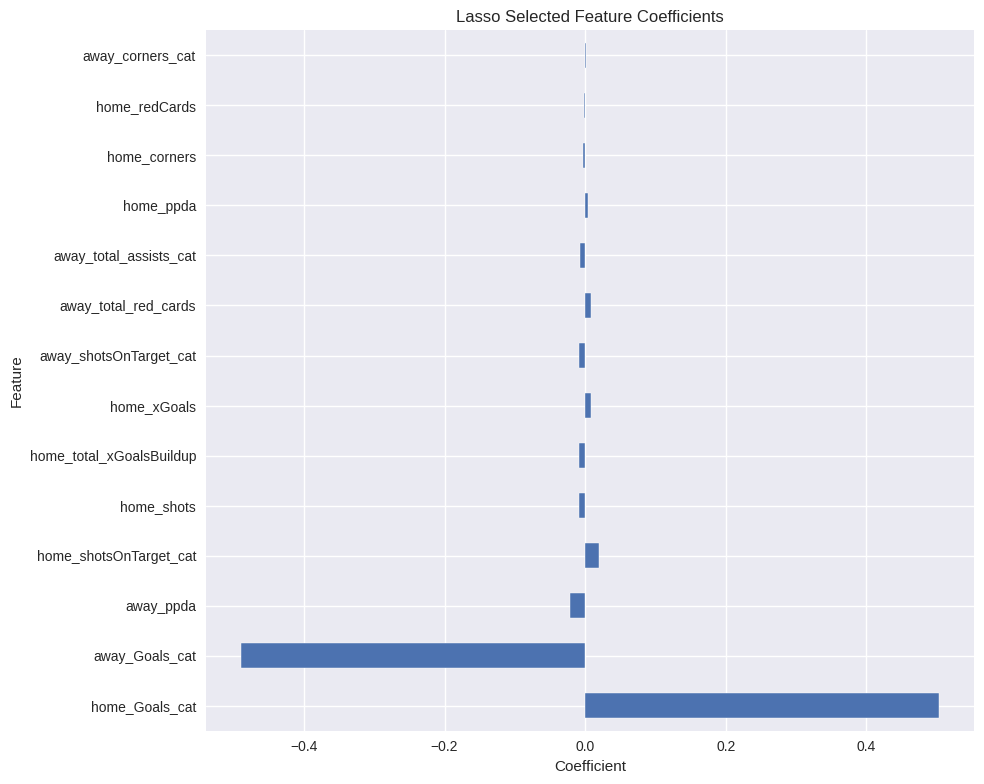

In [75]:
lasso_selected.plot(kind='barh', figsize=(10, 8))
plt.title("Lasso Selected Feature Coefficients")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Variable Selection using Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rfmod = RandomForestClassifier().fit(X_scaled, y_clean)
#rfmod.feature_importances_ 

In [84]:
model = SelectFromModel(rfmod, prefit=True)
model.get_support()

array([False, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [86]:
selected_rf_features = X_model_input.columns[model.get_support()]


In [105]:
varSel['RandomForest'] = varSel['Variable'].isin(selected_rf_features).astype('int64')


In [88]:
varSel[varSel['RandomForest'] == 1]


,Variable,Univarable,Lasso,RandomForest
6,home_Goals,1,0,1
7,away_Goals,1,0,1
8,home_GoalsHalfTime,1,0,1
9,away_GoalsHalfTime,1,0,1
10,home_xGoals,1,1,1
19,home_total_assists,1,0,1
20,home_total_xAssists,1,0,1
28,away_xGoals,1,0,1
37,away_total_assists,1,0,1
52,home_total_assists_cat,1,0,1


In [89]:
varSel['RandomForest'].sum()


13

In [112]:
# Intersection with Lasso
display(varSel[(varSel['RandomForest'] == 1) & (varSel['Lasso'] == 1)])

# Triple intersection: RF + Lasso + Univariate
display(varSel[(varSel['RandomForest'] == 1) & (varSel['Lasso'] == 1) & (varSel['Univarable'] == 1)])


,Variable,Univarable,Lasso,RandomForest,GradienBoosting
10,home_xGoals,1,1,1,0
53,away_total_assists_cat,1,1,1,0
56,home_Goals_cat,1,1,1,1
57,away_Goals_cat,1,1,1,1


,Variable,Univarable,Lasso,RandomForest,GradienBoosting
10,home_xGoals,1,1,1,0
53,away_total_assists_cat,1,1,1,0
56,home_Goals_cat,1,1,1,1
57,away_Goals_cat,1,1,1,1


In [96]:
rf = RandomForestClassifier(random_state=42)
model = SelectFromModel(estimator=rf)
model.fit(X_scaled, y_clean)

SelectFromModel(estimator=RandomForestClassifier(random_state=42))

In [97]:
importances = pd.Series(model.estimator_.feature_importances_, index=X_model_input.columns)
importances = importances[importances != 0].sort_values(ascending=False)
importances.head(20)


home_Goals                  0.144157
away_Goals                  0.133237
home_Goals_cat              0.127784
away_Goals_cat              0.105205
home_total_assists          0.050917
away_total_assists          0.049632
home_total_assists_cat      0.042954
away_total_assists_cat      0.039263
away_GoalsHalfTime          0.023741
away_xGoals                 0.022401
home_GoalsHalfTime          0.020229
home_xGoals                 0.018936
home_total_xAssists         0.010480
away_shotsOnTarget          0.010151
home_shotsOnTarget          0.008964
home_total_xGoalsChain      0.008139
away_total_xGoalsBuildup    0.007158
away_total_xGoalsChain      0.007022
away_total_xAssists         0.006963
home_shotsOnTarget_cat      0.006163
dtype: float64

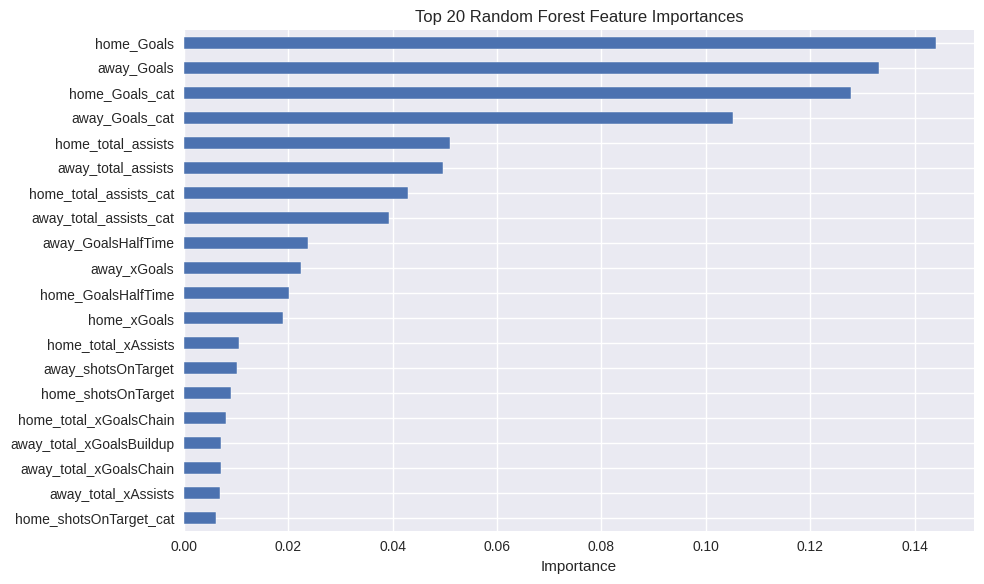

In [98]:
importances.head(20).plot(kind='barh', figsize=(10, 6))
plt.title("Top 20 Random Forest Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Variable Selection using Gradient Boosting classification

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

In [100]:
gbmod = GradientBoostingClassifier().fit(X_scaled, y_clean)

In [101]:
model = SelectFromModel(gbmod, prefit=True)
model.get_support()

array([False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [103]:
selected_gb_features = X_model_input.columns[model.get_support()]

In [106]:
varSel['GradienBoosting'] = varSel['Variable'].isin(selected_gb_features).astype('int64')


In [107]:
varSel[varSel['GradienBoosting'] == 1]


,Variable,Univarable,Lasso,RandomForest,GradienBoosting
6,home_Goals,1,0,1,1
7,away_Goals,1,0,1,1
56,home_Goals_cat,1,1,1,1
57,away_Goals_cat,1,1,1,1


In [108]:
varSel['GradienBoosting'].sum()


4

In [111]:
# Lasso & GB
display(varSel[(varSel['GradienBoosting'] == 1) & (varSel['Lasso'] == 1)])

# GB & Random Forest
display(varSel[(varSel['GradienBoosting'] == 1) & (varSel['RandomForest'] == 1)])

# Lasso & RF & GB
display(varSel[(varSel['GradienBoosting'] == 1) & 
       (varSel['RandomForest'] == 1) & 
       (varSel['Lasso'] == 1)])

# All 4: GB + RF + Lasso + Univariate
display(varSel[(varSel['GradienBoosting'] == 1) &
       (varSel['RandomForest'] == 1) &
       (varSel['Lasso'] == 1) &
       (varSel['Univarable'] == 1)])


,Variable,Univarable,Lasso,RandomForest,GradienBoosting
56,home_Goals_cat,1,1,1,1
57,away_Goals_cat,1,1,1,1


,Variable,Univarable,Lasso,RandomForest,GradienBoosting
6,home_Goals,1,0,1,1
7,away_Goals,1,0,1,1
56,home_Goals_cat,1,1,1,1
57,away_Goals_cat,1,1,1,1


,Variable,Univarable,Lasso,RandomForest,GradienBoosting
56,home_Goals_cat,1,1,1,1
57,away_Goals_cat,1,1,1,1


,Variable,Univarable,Lasso,RandomForest,GradienBoosting
56,home_Goals_cat,1,1,1,1
57,away_Goals_cat,1,1,1,1


In [115]:
gb = GradientBoostingClassifier(random_state=42)
model = SelectFromModel(estimator=gb)
model.fit(X_scaled, y_clean)

SelectFromModel(estimator=GradientBoostingClassifier(random_state=42))

In [117]:
importances = pd.Series(model.estimator_.feature_importances_, index=X_model_input.columns)
importances = importances[importances != 0].sort_values(ascending=False)
importances.head(20)

away_Goals                       0.270372
home_Goals                       0.254497
away_Goals_cat                   0.249122
home_Goals_cat                   0.225023
away_cumulative_goals_against    0.000377
awayTeamID                       0.000161
gameID                           0.000079
away_total_assists               0.000040
away_total_assists_cat           0.000032
away_total_blocked_shots         0.000031
away_total_xGoalsBuildup         0.000026
away_avg_goals_for               0.000025
month                            0.000022
form_vs_discipline_gap           0.000020
away_xGoals                      0.000019
away_GoalsHalfTime               0.000017
home_ppda                        0.000015
rolling_xG_vs_shot_conceded      0.000014
home_GoalsHalfTime               0.000012
away_total_xAssists              0.000012
dtype: float64

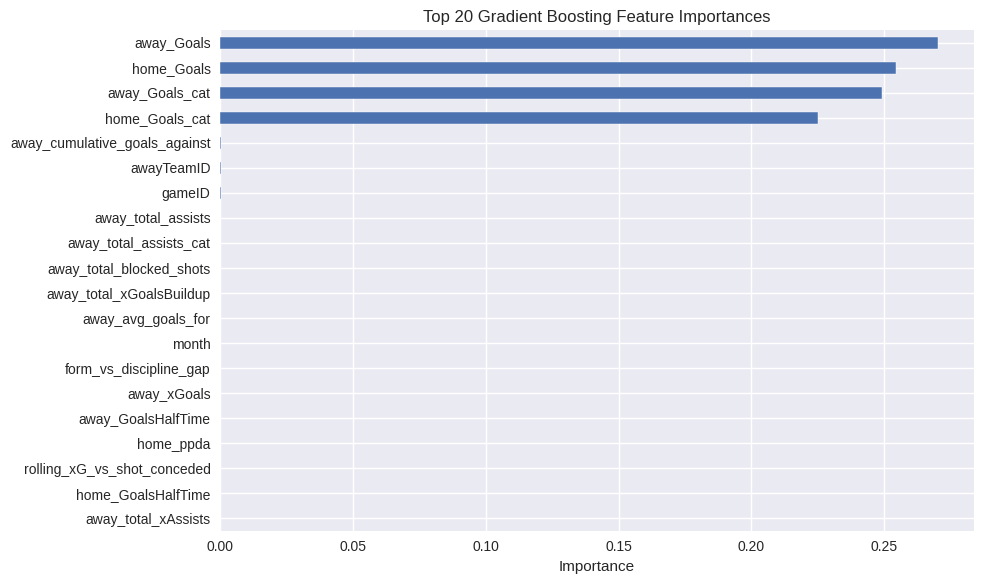

In [118]:
importances.head(20).plot(kind='barh', figsize=(10, 6))
plt.title("Top 20 Gradient Boosting Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Variable Selection using SVM classification

In [119]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

svmmod = LinearSVC(C=0.01, penalty="l1",dual=False).fit(X, y)

In [120]:
model = SelectFromModel(svmmod, prefit=True)
model.get_support()

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True,  True, False,  True, False,  True, False, False,
        True, False, False,  True, False, False, False,  True, False,
        True, False,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False, False,  True, False,
       False, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False,  True,  True])

In [121]:
selected_svm_features = X_model_input.columns[model.get_support()]

In [122]:
varSel['SVM'] = varSel['Variable'].isin(selected_svm_features).astype('int64')


In [123]:
varSel[varSel['SVM'] == 1]

,Variable,Univarable,Lasso,RandomForest,GradienBoosting,SVM
0,gameID,1,0,0,0,1
4,homeTeamID,1,0,0,0,1
6,home_Goals,1,0,1,1,1
7,away_Goals,1,0,1,1,1
8,home_GoalsHalfTime,1,0,1,0,1
11,home_shots,1,1,0,0,1
12,home_shotsOnTarget,1,0,0,0,1
14,home_ppda,1,1,0,0,1
16,home_corners,1,1,0,0,1
19,home_total_assists,1,0,1,0,1


In [127]:
varSel['SVM'].sum()


50

In [128]:
# Get absolute value of coefficients (shape: [n_classes, n_features])
coefs = np.abs(svmmod.coef_)  # shape: (n_classes, n_features)

# Reduce to one score per feature — use max or sum across classes
reduced_coefs = coefs.max(axis=0)  # or .sum(axis=0)

# Now match to column names
selected_svm_features = X_model_input.columns[reduced_coefs != 0]

In [129]:
svm_result = pd.Series(reduced_coefs, index=X_model_input.columns)
svm_result = svm_result[svm_result != 0].sort_values(ascending=False)
svm_result.head(20)

home_Goals_cat              2.152787
away_Goals_cat              1.955288
away_Goals                  1.454659
home_Goals                  1.268327
away_shotsOnTarget_cat      0.038095
away_total_xAssists         0.034596
away_shotsOnTarget          0.033229
home_total_assists          0.027266
home_yellowCards_cat        0.025312
home_shotsOnTarget          0.024450
home_GoalsHalfTime          0.022891
away_fouls                  0.022028
home_corners                0.019505
away_total_xGoalsChain      0.018256
home_shots                  0.016529
away_total_assists          0.016480
home_total_xGoalsChain      0.015486
away_total_blocked_shots    0.014447
home_shotsOnTarget_cat      0.012255
away_rolling_goal_per_xg    0.012021
dtype: float64

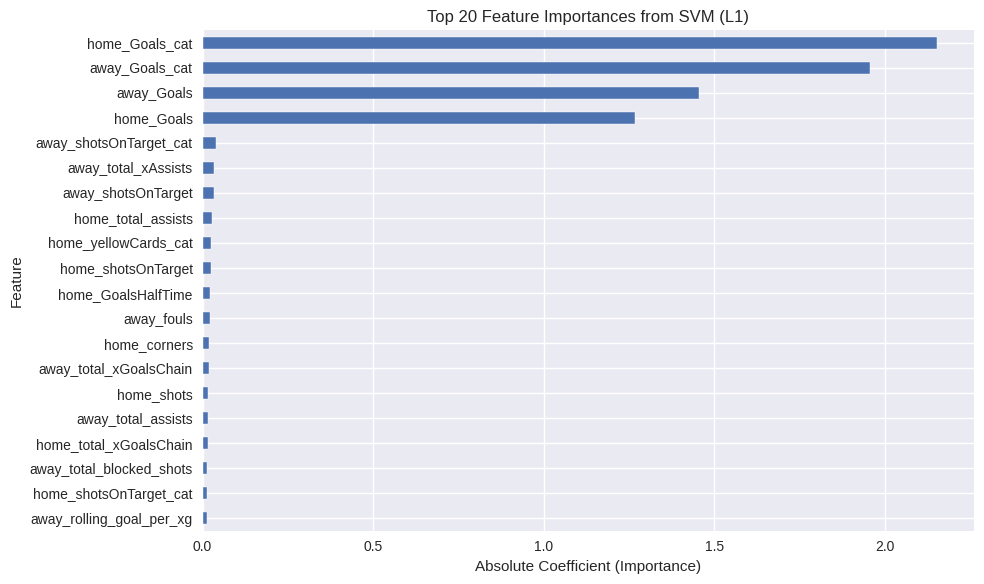

In [130]:
# Plot top 20 SVM feature importances
svm_result.head(20).plot(kind='barh', figsize=(10, 6))
plt.title("Top 20 Feature Importances from SVM (L1)")
plt.xlabel("Absolute Coefficient (Importance)")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # So highest is on top
plt.tight_layout()
plt.show()

## Summarization and Selection of Variables


In [131]:
varSel['Sum'] =  np.sum(varSel,axis=1)
varSel

,Variable,Univarable,Lasso,RandomForest,GradienBoosting,SVM,Sum
0,gameID,1,0,0,0,1,2
1,leagueID,0,0,0,0,0,0
2,season,1,0,0,0,0,1
3,date,0,0,0,0,0,0
4,homeTeamID,1,0,0,0,1,2
...,...,...,...,...,...,...,...
101,rolling_shot_rate_vs_blocks,0,0,0,0,0,0
102,discipline_matchup_score,0,0,0,0,0,0
103,interaction_away_goal_rate_vs_home_def,0,0,0,0,0,0
104,interaction_away_form_vs_home_cards,0,0,0,0,1,1


In [132]:

varSel.groupby('Sum')['Variable'].count()

Sum
0    29
1    35
2    24
3    14
4     2
5     2
Name: Variable, dtype: int64

In [133]:
varSel[varSel['Sum']==5]

,Variable,Univarable,Lasso,RandomForest,GradienBoosting,SVM,Sum
56,home_Goals_cat,1,1,1,1,1,5
57,away_Goals_cat,1,1,1,1,1,5


In [135]:
varSel[varSel['Sum']==3]

,Variable,Univarable,Lasso,RandomForest,GradienBoosting,SVM,Sum
8,home_GoalsHalfTime,1,0,1,0,1,3
10,home_xGoals,1,1,1,0,0,3
11,home_shots,1,1,0,0,1,3
14,home_ppda,1,1,0,0,1,3
16,home_corners,1,1,0,0,1,3
19,home_total_assists,1,0,1,0,1,3
28,away_xGoals,1,0,1,0,1,3
32,away_ppda,1,1,0,0,1,3
37,away_total_assists,1,0,1,0,1,3
43,away_total_red_cards,1,1,0,0,1,3


In [137]:
varSel[varSel['Sum']>=3]

,Variable,Univarable,Lasso,RandomForest,GradienBoosting,SVM,Sum
6,home_Goals,1,0,1,1,1,4
7,away_Goals,1,0,1,1,1,4
8,home_GoalsHalfTime,1,0,1,0,1,3
10,home_xGoals,1,1,1,0,0,3
11,home_shots,1,1,0,0,1,3
14,home_ppda,1,1,0,0,1,3
16,home_corners,1,1,0,0,1,3
19,home_total_assists,1,0,1,0,1,3
28,away_xGoals,1,0,1,0,1,3
32,away_ppda,1,1,0,0,1,3


In [138]:
varSel[varSel['Sum']>=2]

,Variable,Univarable,Lasso,RandomForest,GradienBoosting,SVM,Sum
0,gameID,1,0,0,0,1,2
4,homeTeamID,1,0,0,0,1,2
6,home_Goals,1,0,1,1,1,4
7,away_Goals,1,0,1,1,1,4
8,home_GoalsHalfTime,1,0,1,0,1,3
9,away_GoalsHalfTime,1,0,1,0,0,2
10,home_xGoals,1,1,1,0,0,3
11,home_shots,1,1,0,0,1,3
12,home_shotsOnTarget,1,0,0,0,1,2
14,home_ppda,1,1,0,0,1,3


In [139]:
type(varSel)

pandas.core.frame.DataFrame

In [142]:
final_var = varSel[varSel['Sum']>=3]['Variable'].tolist()
df_model = df[final_var].copy()
## add our Y 
df_model['gameresult'] = df['gameresult'].copy()

In [143]:
df_model.shape


(12680, 19)

In [144]:
df_model.to_csv('../csvs/df_model.csv')


In [151]:
# saving df for modeling
with open("../pickles/df_model.pkl", "wb") as f:
    pickle.dump(df_model, f)  # Save the DataFrame with standard pickle

## Setting proportion for Train, Test, Dev


In [146]:
from pyMechkar.analysis import train_test

In [147]:
train, temp = train_test(df_model, prop=0.6, seed=18)

Begining analysis...
Factorizing... please wait
*******************
[]
********************
********************
['Unable to calcualte the Fisher exact test for variables away_total_red_cards and split... The p-value may be incorrect']
------ Finished in 7.765838146209717econds -----
 
You got a perfectly balanced training and test datasets
 


In [148]:
#60%
train.shape

(7608, 20)

In [149]:
df_object_train =  train.select_dtypes(include = ['object']).columns

## Encoding Categorial Data

In [161]:
# Select all categorical columns: both object and category
cat_cols = train.select_dtypes(include=['object', 'category']).columns

# Encode all of them
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
train[cat_cols] = ord_enc.fit_transform(train[cat_cols])

In [162]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7608 entries, 8859 to 11119
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   home_Goals              7608 non-null   int64  
 1   away_Goals              7608 non-null   int64  
 2   home_GoalsHalfTime      7608 non-null   int64  
 3   home_xGoals             7608 non-null   float64
 4   home_shots              7608 non-null   float64
 5   home_ppda               7608 non-null   float64
 6   home_corners            7608 non-null   float64
 7   home_total_assists      7608 non-null   int64  
 8   away_xGoals             7608 non-null   float64
 9   away_ppda               7608 non-null   float64
 10  away_total_assists      7608 non-null   int64  
 11  away_total_red_cards    7608 non-null   int64  
 12  home_shotsOnTarget_cat  7608 non-null   float64
 13  away_shotsOnTarget_cat  7608 non-null   float64
 14  home_total_assists_cat  7608 non-nul

In [163]:
train.to_csv('../csvs/Football_Database_train.csv')

In [164]:
# saving df after finishing feature engineering
with open("../pickles/train.pkl", "wb") as f:
    pickle.dump(train, f)  # Save the DataFrame with standard pickle

In [165]:

dev, test = train_test(temp, prop=0.5, seed=18)

Begining analysis...
Factorizing... please wait
*******************
[]
********************
********************
[]
------ Finished in 7.452263355255127econds -----
 
You got a perfectly balanced training and test datasets
 


In [172]:
# Select all categorical columns: both object and category
cat_cols_test = test.select_dtypes(include=['object', 'category']).columns

ord_enc_test = OrdinalEncoder()
test[cat_cols] = ord_enc.fit_transform(test[cat_cols])

# Select all categorical columns: both object and category
cat_cols_dev = dev.select_dtypes(include=['object', 'category']).columns

ord_enc_dev = OrdinalEncoder()
dev[cat_cols] = ord_enc.fit_transform(dev[cat_cols])

In [173]:
#50%
test.shape

(2536, 20)

In [174]:
test.to_csv('../csvs/Football_Database_test.csv')

# saving df after finishing feature engineering
with open("../pickles/test.pkl", "wb") as f:
    pickle.dump(test, f)  # Save the DataFrame with standard pickle

In [175]:
test

,home_Goals,away_Goals,home_GoalsHalfTime,home_xGoals,home_shots,home_ppda,home_corners,home_total_assists,away_xGoals,away_ppda,away_total_assists,away_total_red_cards,home_shotsOnTarget_cat,away_shotsOnTarget_cat,home_total_assists_cat,away_total_assists_cat,home_Goals_cat,away_Goals_cat,gameresult,split
9123,1,0,0,1.354740,10.000000,6.1111,7.0,1,0.484752,10.8800,0,0,5.0,6.0,1.0,0.0,1.0,0.0,2,test
809,0,0,0,1.030380,19.000000,2.2500,4.0,0,0.263110,12.7333,0,0,5.0,4.0,0.0,0.0,0.0,0.0,1,test
780,0,1,0,0.744526,15.000000,7.5758,4.0,0,1.413000,6.0476,1,0,4.0,5.0,0.0,1.0,0.0,1.0,0,test
265,3,2,3,2.074880,11.000000,10.8571,3.0,2,1.216380,8.1000,1,0,7.0,4.0,2.0,1.0,3.0,2.0,2,test
12190,1,1,0,1.754310,13.484856,3.3704,10.0,0,0.547118,23.8000,1,1,10.0,4.0,0.0,1.0,1.0,1.0,1,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4626,1,4,1,1.495350,16.000000,10.6190,9.0,1,3.363920,12.4615,3,0,8.0,11.0,1.0,3.0,1.0,4.0,0,test
11262,1,2,1,1.474980,13.000000,7.6000,13.0,1,1.407060,4.7647,2,0,8.0,6.0,1.0,2.0,1.0,2.0,0,test
3731,1,3,1,0.600074,8.000000,10.0000,2.0,1,1.517170,11.6923,2,0,4.0,6.0,1.0,2.0,1.0,3.0,0,test
439,2,0,1,0.569734,13.000000,10.9583,7.0,2,0.776105,9.6111,0,0,6.0,4.0,2.0,0.0,2.0,0.0,2,test


In [176]:
dev.to_csv('../csvs/Football_Database_dev.csv')

# saving df after finishing feature engineering
with open("../pickles/dev.pkl", "wb") as f:
    pickle.dump(dev, f)  # Save the DataFrame with standard pickle

In [177]:
dev

,home_Goals,away_Goals,home_GoalsHalfTime,home_xGoals,home_shots,home_ppda,home_corners,home_total_assists,away_xGoals,away_ppda,away_total_assists,away_total_red_cards,home_shotsOnTarget_cat,away_shotsOnTarget_cat,home_total_assists_cat,away_total_assists_cat,home_Goals_cat,away_Goals_cat,gameresult,split
10682,0,7,0,0.537278,11.0,8.2727,4.0,0,5.346760,7.3200,3,0,6.0,3.0,0.0,3.0,0.0,4.0,0,train
10794,0,0,0,1.027300,14.0,18.6000,4.0,0,0.716385,14.1875,0,0,7.0,4.0,0.0,0.0,0.0,0.0,1,train
2455,1,0,1,1.082450,9.0,9.6667,4.0,1,0.505706,6.1923,0,0,6.0,5.0,1.0,0.0,1.0,0.0,2,train
6463,0,1,0,0.106979,2.0,10.0000,1.0,0,1.471830,6.6190,1,0,0.0,8.0,0.0,1.0,0.0,1.0,0,train
168,0,0,0,0.973378,22.0,5.4706,8.0,0,0.401988,12.1515,0,0,4.0,4.0,0.0,0.0,0.0,0.0,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,1,1,1,1.256860,15.0,4.4286,4.0,1,0.234038,11.2609,1,1,6.0,5.0,1.0,1.0,1.0,1.0,1,train
1487,0,0,0,0.138495,4.0,6.5957,6.0,0,1.003940,2.5455,0,0,1.0,4.0,0.0,0.0,0.0,0.0,1,train
4070,1,2,0,1.424000,16.0,4.9200,4.0,1,1.329110,12.0000,2,0,5.0,4.0,1.0,2.0,1.0,2.0,0,train
4404,3,1,1,2.011290,7.0,11.8261,0.0,2,2.038150,6.8571,0,0,6.0,6.0,2.0,0.0,3.0,1.0,2,train


In [178]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2536 entries, 10682 to 9411
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   home_Goals              2536 non-null   int64  
 1   away_Goals              2536 non-null   int64  
 2   home_GoalsHalfTime      2536 non-null   int64  
 3   home_xGoals             2536 non-null   float64
 4   home_shots              2536 non-null   float64
 5   home_ppda               2536 non-null   float64
 6   home_corners            2536 non-null   float64
 7   home_total_assists      2536 non-null   int64  
 8   away_xGoals             2536 non-null   float64
 9   away_ppda               2536 non-null   float64
 10  away_total_assists      2536 non-null   int64  
 11  away_total_red_cards    2536 non-null   int64  
 12  home_shotsOnTarget_cat  2536 non-null   float64
 13  away_shotsOnTarget_cat  2536 non-null   float64
 14  home_total_assists_cat  2536 non-nul